In [2]:
import sys 
sys.path.append("../models/")
from Basin import Basin 
from functions import plot_style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
colors = plot_style("../fonts/Encode_Sans_Condensed/")

countries =['Sri-Lanka', 'El-Salvador', 'Morocco', 'Bolivia', 'Honduras',
            'Philippines', 'Indonesia', 'Pakistan', 'Rwanda', 'Bangladesh',
            'Kyrgyzstan', 'Egypt', 'Mozambique', 'Afghanistan', 'Angola',
            'Ghana', 'Zambia', "Cote-dIvoire", 'Kenya', 'Uganda']

def get_spectral_radius(C, Nk):
    C_hat = np.zeros((C.shape[0], C.shape[1]))    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            C_hat[i, j] = (Nk[i] / Nk[j]) * C[i, j]
    return np.max([e.real for e in np.linalg.eig(C_hat)[0]])

../models/functions.py:286: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [3]:
# find min max for color bar and get spectral radius
rhos, avg_ages = [], []
min_, max_ = 10**6, -10
for country in countries:
    basin = Basin(country, '../basins/')
    if basin.contacts_matrix.min() < min_:
        min_ = basin.contacts_matrix.min()

    if basin.contacts_matrix.max() > max_:
        max_ = basin.contacts_matrix.max()

    rhos.append(get_spectral_radius(basin.contacts_matrix, basin.Nk))
    avg_ages.append(((basin.Nk * np.array([4.5, 14.5, 22, 27, 34.5, 44.5, 54.5, 64.5, 74.5, 84.5]))).sum() / basin.Nk.sum())

rhos, countries, avg_ages= np.array(rhos), np.array(countries), np.array(avg_ages)

## Contact Matrices

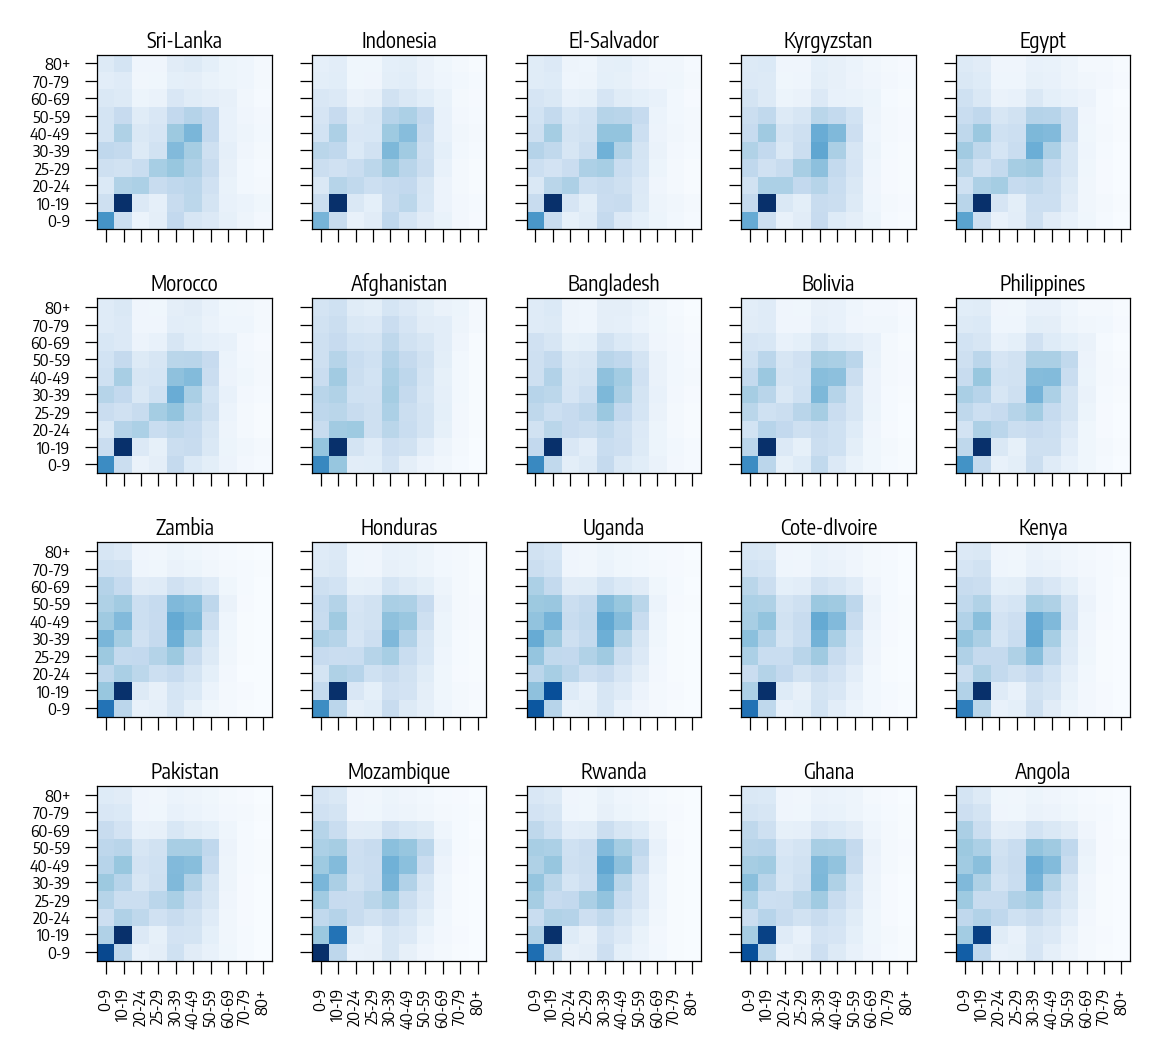

In [4]:
fig, axes = plt.subplots(nrows=4, ncols=5, dpi=300, sharex=True, sharey=True)
idxs = np.argsort(rhos)
idxs = idxs[::-1]

for country, ax in zip(countries[idxs], axes.ravel()):
    basin = Basin(country, '../basins/')
    ax.imshow(basin.contacts_matrix, origin="lower", cmap="Blues", vmin=min_, vmax=max_/1.5)
    ax.set_xticks(range(10))
    ax.set_yticks(range(10))
    ax.set_xticklabels(["0-9", "10-19", "20-24", "25-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], rotation=90)
    ax.set_yticklabels(["0-9", "10-19", "20-24", "25-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"])
    ax.tick_params(axis='both', labelsize=4)
    ax.set_title(country, fontsize=5, y=0.9)

plt.subplots_adjust(hspace=0.4, wspace=-0.6)

plt.savefig('./img/contact_matrices.pdf', bbox_inches='tight')

## Spectral Radius

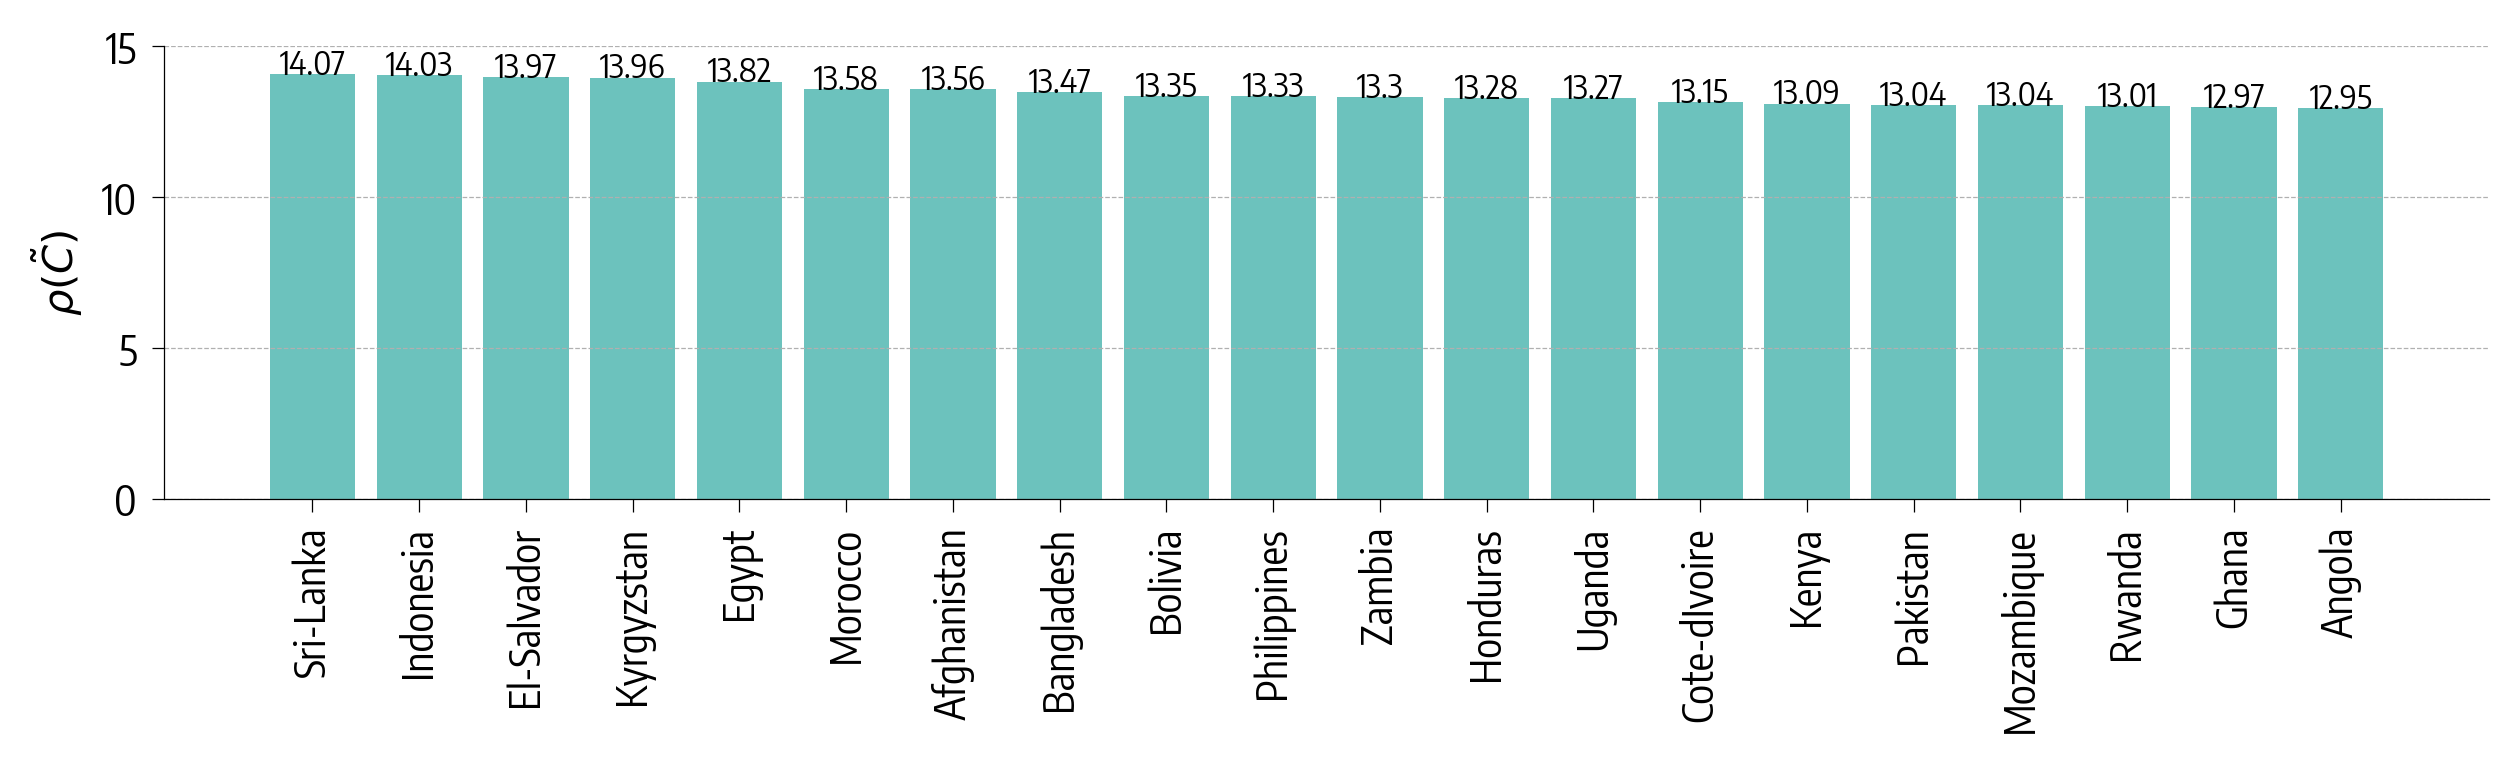

In [5]:
idxs = np.argsort(rhos)
idxs = idxs[::-1]


fig, ax = plt.subplots(dpi=300, figsize=(10, 2))
ax.bar(countries[idxs], rhos[idxs], color=colors[0])
for i, k in zip(range(len(countries)), rhos[idxs]):
    ax.annotate(xy=(i, k), text=str(np.round(k, 2)), ha='center', fontsize=8)

ax.spines['top'].set_visible(False)
ax.set_yticks([0,5,10,15])
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', linewidth=0.3)

ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('$\\rho (\\tilde{C})$')

plt.savefig('./img/spectral_radius.pdf', bbox_inches='tight')


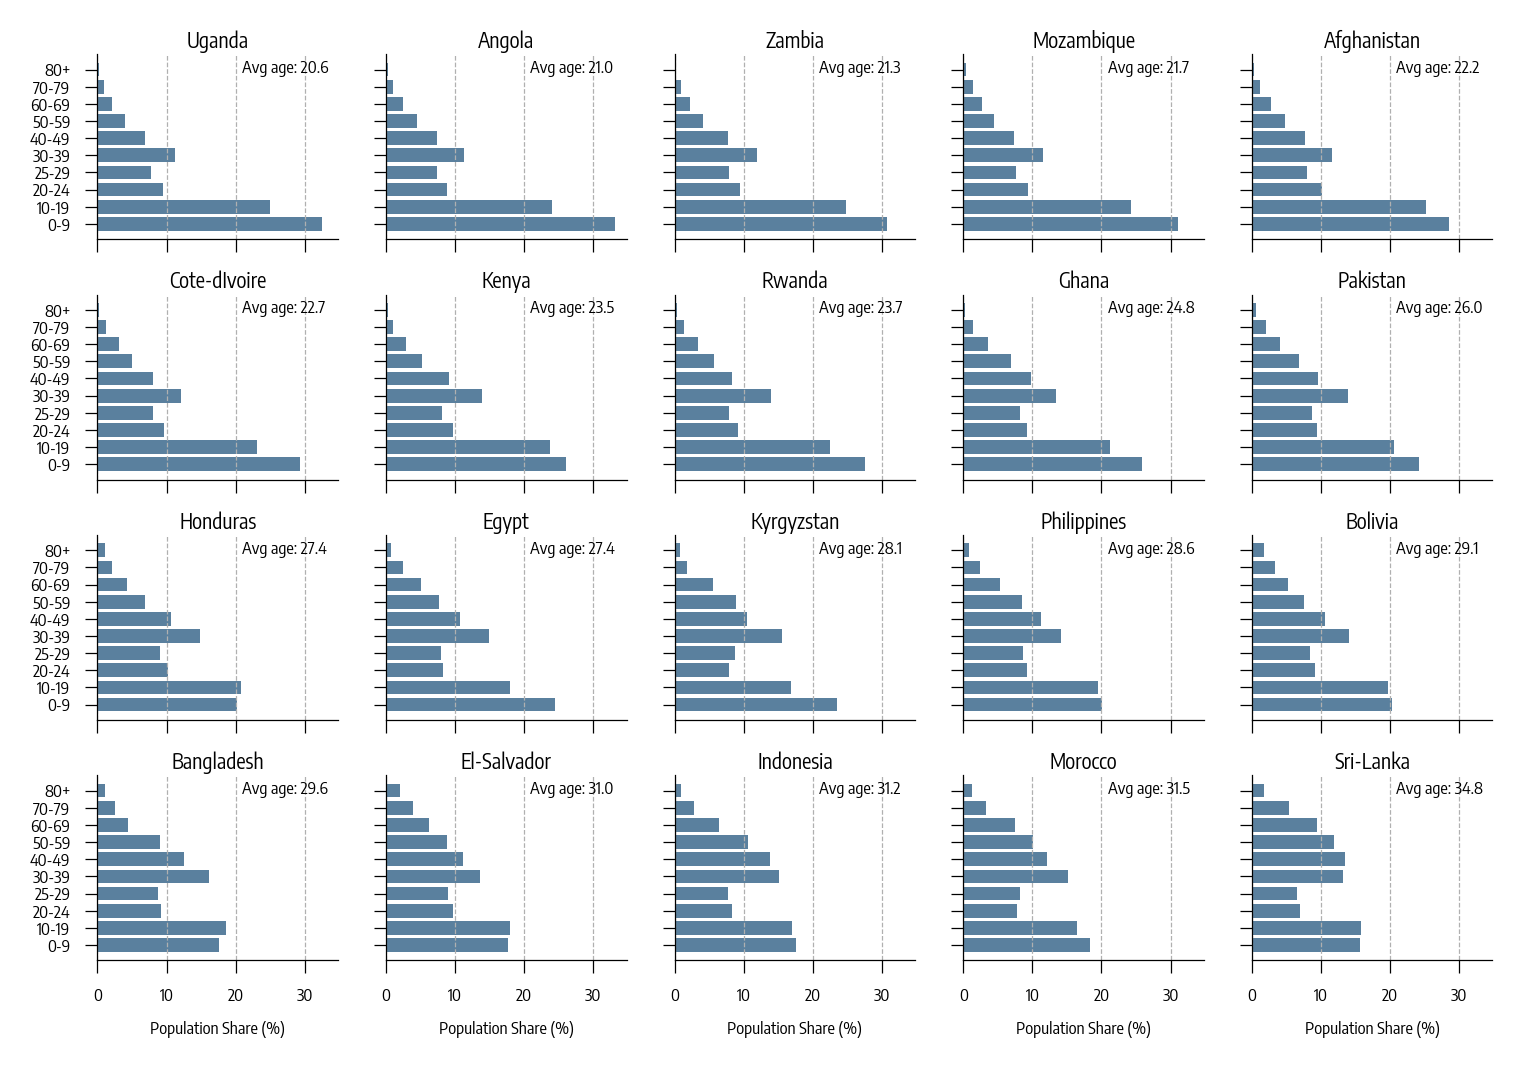

In [6]:
fig, axes = plt.subplots(nrows=4, ncols=5, dpi=300, sharex=True, sharey=True)
ages = ["0-9", "10-19", "20-24", "25-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"]


idxs = np.argsort(avg_ages)
for country, ax, avg_age in zip(countries[idxs], axes.ravel(), avg_ages[idxs]):
    basin = Basin(country, '../basins/')
    pop_share = basin.Nk / basin.Nk.sum() * 100
    ax.barh(ages, pop_share, color=colors[1])
    ax.set_title(country, fontsize=5, y=0.9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='x', linestyle='--', linewidth=0.3)
    ax.tick_params(axis='both', labelsize=4)    
    ax.annotate(xy=(0.6, 0.9), xycoords='axes fraction', text='Avg age: ' + str(np.round(avg_age, 1)), fontsize=4)

for ax in axes[-1, :]:
    ax.set_xlabel('Population Share (%)', fontsize=4)
plt.subplots_adjust(hspace=0.3)

plt.savefig('./img/age_groups.pdf', bbox_inches='tight')
